# SAFARI app
We are going to use this Notebook to train our YOLOv8 model using the dataset already provided with animal images and anotations. To speed up the trainig, we will use the GPU card we had configured and 

## Setup
Clone Ultralytics' GitHub [repository](https://github.com/ultralytics/ultralytics), install ultralytics and imoprt YOLO.

In [1]:
!pip install --upgrade pip
!pip install pickleshare
!pip install seaborn
!pip install opencv-python-headless

!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics

from ultralytics import YOLO
from PIL import Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 61.1 MB/s eta 0:00:00a 0:00:01m
Cloning into 'ultralytics'...
remote: Enumerating objects: 23553, done.
remote: Counting objects: 100% (598/598), done.
remote: Compressing objects: 100% (416/416), done.
remote: Total 23553 (delta 349), reused 325 (delta 182), pack-reused 22955
Receiving objects: 100% (23553/23553), 14.19 MiB | 20.68 MiB/s, done.
Resolving deltas: 100% (16427/16427), done.
/opt/app-root/src/safari-demo/notebooks/ultralytics


## Data preparation
Data preparation is usually a big task. You might have to clean, label and format data into training and test data sets. Let's see the content of our dataset: 

In [2]:
!ls /opt/app-root/src/safari-demo/dataset/*

/opt/app-root/src/safari-demo/dataset/data.yaml

/opt/app-root/src/safari-demo/dataset/test:
images	labels

/opt/app-root/src/safari-demo/dataset/train:
images	labels

/opt/app-root/src/safari-demo/dataset/validation:
sample.mp4  sample.png


## Model training
Train the YOLOv8 model by specifying dataset, batch-size, image size and pretrained --weights yolov8m.pt. Pretrained weights are auto-downloaded from the latest [YOLOv8 release](https://github.com/ultralytics/ultralytics).

In [ ]:
model = YOLO("yolov8m.pt")
model.train(data='/opt/app-root/src/safari-demo/dataset/data.yaml', epochs=100, imgsz=640, batch=16)

## Validation
Now that we have our model, we can made predictions with new images:


image 1/1 /opt/app-root/src/safari-demo/dataset/validation/sample.png: 448x640 1 Polar bear, 78.2ms
Speed: 3.1ms preprocess, 78.2ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/predict


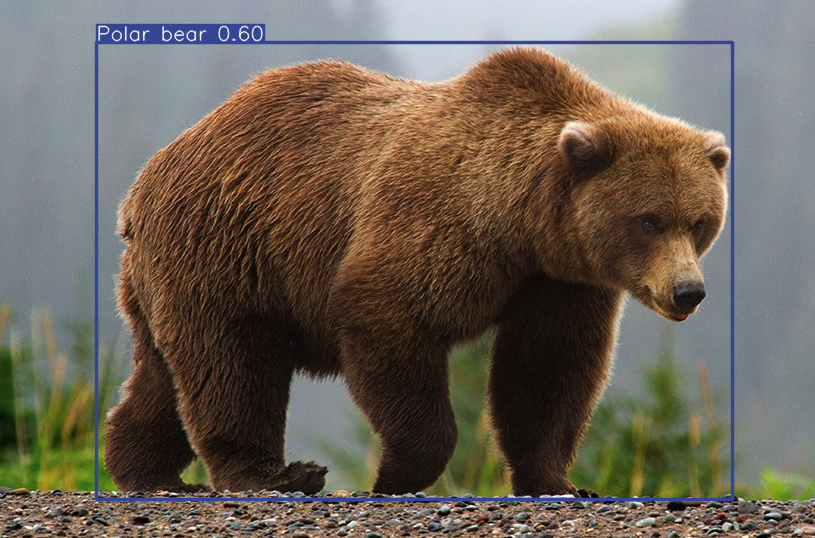

In [4]:
model = YOLO('/opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights/best.pt')
results = model('/opt/app-root/src/safari-demo/dataset/validation/sample.png', save=True)
Image.open('/opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/predict/sample.png')

## Export 
Finally, we're going to export our file in ONNX format so we can use it in our application. Make sure to change the path to correspond with where your weights are saved.

In [5]:
model.export(format='onnx')

Ultralytics YOLOv8.1.42 🚀 Python-3.9.18 torch-2.0.1+cu118 CPU (Intel Xeon Silver 4116 2.10GHz)

PyTorch: starting from '/opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (99.2 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 8.0s, saved as '/opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights/best.onnx' (99.0 MB)

Export complete (17.4s)
Results saved to /opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights
Predict:         yolo predict task=detect model=/opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/opt/a

'/opt/app-root/src/safari-demo/notebooks/ultralytics/runs/detect/train/weights/best.onnx'

## Next
Now that we have exported our model, download the file. The next step will be to deploy our Safari application using MicroShift. 

## Extra Fun: Video Recognition
If you want to do one more prediction, let's make some with a video.

In [ ]:
results = model('/opt/app-root/src/safari-demo/dataset/validation/sample.mp4', save=True, imgsz=640)